<a href="https://colab.research.google.com/github/MarcoAlejandroSoto/phytonCasos/blob/main/Caso10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Determinar e interpretar la prueba de Yule

# Descripción

* A partir de unos datos recabados y cargados se forma tabla de contingencia
* Se determina el valor de *p_prueba* (probabilidad)
* Se determina los valores a, b, c y d de la tabla de contingencia de una estructura de n * n (2 * 2).
* Se determina el valor de alfa de significacncia, normalmente al $\alpha = 0.05$.
* Se contrasta el valor de *p_prueba* contra el valor de significancia $\alpha=0.05$ y se toma la decisión de si el valor de Yule tiene un significado entre las variables.

Decisión:

$$
\text{Si } (\chi^{2} < p.valor)\text{: Hay significancia estadística}
$$

$$
\text{de lo contrario:} \text{ No hay significancia estadística}
$$


La fórmula para calcular prueba de Yule; el valor debe salir entre -1 y 1 y significa nivel de relación entre las variables.


$$
Yule = Q = \frac{a\cdot d - b\cdot c}{a\cdot d + b\cdot c}
$$

La fórmula para determinar el valor de chi cuadrada calculada para el contraste contra el valor de *p_valor* de acuerdo al valor de significancia de *alfa* y a un grado $(gl = 1)$ de libertad.

* Si $Q$ está cerca de -1, indica una asociación negativa (las variables están inversamente relacionadas).
* Si $Q$ está cerca de 1, indica una asociación positiva (las variables están directamente relacionadas).
* Si $Q$ está cerca de 0, indica que no hay una asociación lineal.

¿Cómo obtener chi cuadrada?:

$$
Chi cuadrada = \chi^{2} = \frac{|(a\cdot d-b\cdot c)|^2\cdot(a+b+c+d)}{(a+b)\cdot(c+d)\cdot(a+c)\cdot(b+d)}
$$

El valor p (*p_valor*) representa la probabilidad de observar un estadístico de prueba igual o más extremo que el calculado, asumiendo que las variables son independientes.

Si el valor p es menor que un nivel de significancia predefinido ($0.05$), se considera que existe una asociación significativa entre las variables.

Las hipótesis nulas y alternativas serían:

$$
Ho: \text{No hay relación entre variables}
$$

$$
Ha: \text{Si hay relación entre variables}
$$

Si el valor de chi calculado está por la izquierda del valor crítico de chi cuadrada cola a la derecha a 1 grado de libertad, entonces se concluye que no hay evidencia estadística de relación entre dos variables categóricas.


Condición para hipótesis con *chi cuadrada*:

$$
\text{Si (chi calculado < chi critico): Se acepta Ho}
$$

$$
\text{Si (chi calculado ≥ chi critico): Se rechaza Ho}
$$



# Desarrollo





## Cargar librerías




In [ ]:
# Instalar para la sesión de este caso
!pip install scipy


In [ ]:
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import chi2
from scipy.stats import chi2


## Funciones

In [ ]:
def f_visualizar_frec_tabla_contingencia (tabla_cruzada, var1, var2):
  # Crear un gráfico de barras a partir de la tabla cruzada
  tabla_cruzada.plot(kind='bar', stacked=True)

  # Personalizar el gráfico
  plt.title('Diagrama de Barras a partir de la Tabla Cruzada')
  plt.xlabel('Categoría en el Eje X: '+ var1)
  plt.ylabel('Frecuencia en el Eje Y: '+ var2)

  # Mostrar el gráfico
  plt.show()

def f_visualizar_chi_yule(valor_chi_cuad, alfa):
  from scipy.stats import chi2
  import matplotlib.pyplot as plt

  # Grados de libertad
  df = 1

  # Calcular el valor crítico de chi-cuadrada
  valor_critico = chi2.ppf(1 - alfa, df)

  # Crear un rango de valores para x
  x = np.linspace(0, 10, 1000)

  # Calcular la función de densidad de probabilidad de chi-cuadrada
  pdf = chi2.pdf(x, df)

  # Crear una figura y ejes para el gráfico
  fig, ax = plt.subplots()

  # Dibujar la función de densidad de probabilidad
  ax.plot(x, pdf, 'r-', lw=2, label='PDF')

  # Resaltar el valor observado
  ax.axvline(valor_chi_cuad, color='green', linestyle='--', label='Valor de Prueba')

  # Resaltar el valor crítico
  ax.axvline(valor_critico, color='red', linestyle='--', label='Valor Crítico')

  # Etiquetas de los ejes y leyenda
  ax.set_xlabel('Valores de Chi-cuadrado')
  ax.set_ylabel('Densidad de Probabilidad')
  ax.set_title('Distribución Chi-cuadrada')
  ax.legend()

  # Mostrar el gráfico
  plt.show()

# Función que pruea el valor de chi cuadrada en prueba de Yule
# recibe los valores a, b, c, d y devuelve chi cuadrada
# Aunque el resultado sale ligeramente diferente con respecto a la función utilizada
# para obtener chi cuadrada.
def f_chi_cuadrada(a, b, c, d):
  chi = ((abs(a * d - b * c) ** 2) * (a + b + c + d)) / ((a + b) * (c + d) * (a + c) * (b + d))
  return chi


## Cargar los datos

Se recupera una encuesta sobre el estudio de dos variables.

Se hizo una encuesta y fueron seleccionadas aleatoriamente 300 personas.

Se le preguntó a su género que puede ser hombre y mujer etiquetado de la siguiente manera:
* H: Hombre
* M: Mujer
¿Cuál es su género? H: Hombre o M:Mujer

Se les preguntó si consumen alcohol hoy en día (presente) en su distintas denominaciones (cerveza, vino, tequila mezcal, bebidas preparadas, entre otros) y en cualquier cantidad, sean dosis mínimas equilabradas y saluables o ingesta de alcohol.

¿Consume alcohol? Si o No.


## Aquí la tabla de contingencia
\begin{array}{c} \hline
 &  \text{No consume} & \text{Si consume} \\ \hline
 Género&  &  \\
H: Hombre & 15 & 238 \\
M: Mujer & 11 & 46 \\ \hline
\end{array}



## Visualización de tabla de contingencia



Aquí la tabla cruzada para visualizar:
              H   M
No Consume   15  11
Si consume  238  46


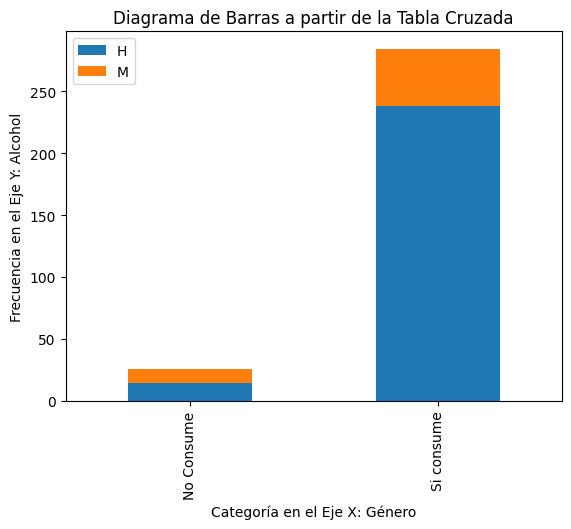

In [ ]:
# Crear una tabla de contingencia a partir de tus datos
datos_abcd = np.array([[15, 238], [11, 46]])

# Crear un DataFrame a partir de los datos
datos = pd.DataFrame(datos_abcd, columns=["No Consume", "Si consume"], index=["H", "M"])

# Convertir el DataFrame a una tabla cruzada
tabla_cruzada = datos.unstack().unstack()
# Mostrar la tabla cruzada
print("Aquí la tabla cruzada para visualizar:")
print(tabla_cruzada)

# Visualizar la tabla cruzada
f_visualizar_frec_tabla_contingencia(tabla_cruzada, "Género", "Alcohol")



## Hacer prueba de Yule

In [ ]:
print("Aquí la tabla de contingencia para prueba Yule solo los datos: ")
print("\n")
print(datos_abcd)
print("\n")


# Realizar la prueba de chi-cuadrado de independencia
chi2, p_valor, _, _ = chi2_contingency(datos_abcd)

# Calcular el coeficiente de Yule
a, b, c, d = datos_abcd.ravel()  # Extraer los valores de la tabla
Yule_coefficient = (a * d - b * c) / (a * d + b * c)

print(f'Valor de Yule: {Yule_coefficient:.2f}')
print(f'Valor de chi2: {chi2:.2f}')
print(f'Valor p_valor (chi-cuadrado): {p_valor:.4f}')


# Probando la f_chi_cuadrada
#chi_cuad = f_chi_cuadrada(a, b, c, d)
#print("Probando con f_chi_cuadrada(): ", chi_cuad)

# Verificar el valor de p

# Realizar una prueba de significancia (se puede ajustar el nivel de significancia )
alfa = 0.05
print ("¿Hay distinción en el consumo de alcohol entre hombres y mujeres ?")
if p_valor < alfa:
    print('Existe una asociación significativa entre las variables, estadísticamente hablando.')
else:
    print('No hay evidencia de una asociación significativa entre las vaiables, estadísticamente hablando.')

Aquí la tabla de contingencia para prueba Yule solo los datos: 


[[ 15 238]
 [ 11  46]]


Valor de Yule: -0.58
Valor de chi2: 9.15
Valor p_valor (chi-cuadrado): 0.0025
¿Hay distinción en el consumo de alcohol entre hombres y mujeres ?
Existe una asociación significativa entre las variables, estadísticamente hablando.


## Visualizar constraste chi cuadrada

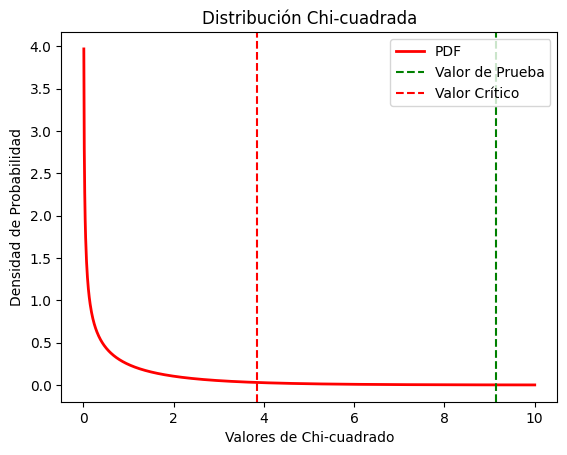

In [ ]:
f_visualizar_chi_yule(chi2, alfa)

# Relación estudiar no estudiar aprobar no aprobar

\begin{array}{c} \hline
 &  \text{No aprobar} & \text{Aprobar} \\ \hline
 Estudio&  &  \\
Estudiar & 15 & 40 \\
\text{No estudiar} & 25 & 20 \\ \hline
\end{array}

## Visualización de tabla de contingencia

Aquí la tabla cruzada para visualizar:
            Estudiar  No estudiar
No aprobar        15           25
Aprobar           40           20


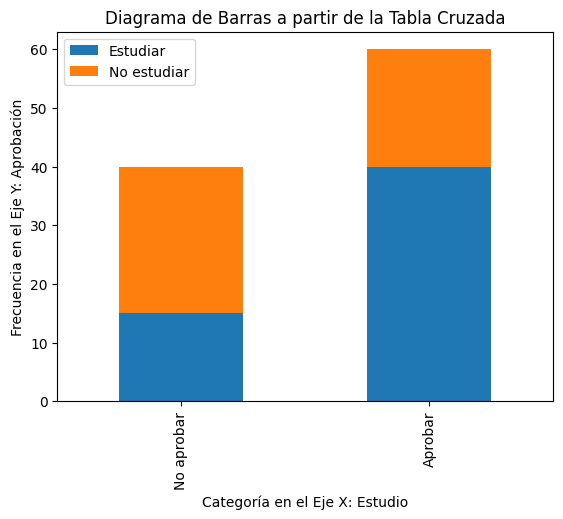

In [ ]:
# Crear una tabla de contingencia a partir de los datos
datos_abcd = np.array([[15, 40], [25, 20]])

# Crear un DataFrame a partir de los datos
datos = pd.DataFrame(datos_abcd, columns=["No aprobar", "Aprobar"], index=["Estudiar", "No estudiar"])

# Convertir el DataFrame a una tabla cruzada
tabla_cruzada = datos.unstack().unstack()
# Mostrar la tabla cruzada
print("Aquí la tabla cruzada para visualizar:")
print(tabla_cruzada)

# Visualizar la tabla cruzada
f_visualizar_frec_tabla_contingencia(tabla_cruzada, "Estudio", "Aprobación")


In [ ]:
# Crear una tabla de contingencia a partir de tus datos
#tabla_de_contingencia = np.array([[15, 40], [25, 20]])  # FALSE/TRUE en función de género

print("Aquí la tabla de contingencia: ")
print("\n")
print(datos_abcd)
print("\n")

# Realizar la prueba de chi-cuadrado de independencia
chi2, p_valor, _, _ = chi2_contingency(datos_abcd)

# Calcular el coeficiente de Yule
a, b, c, d = datos_abcd.ravel()  # Extraer los valores de la tabla
Yule_coefficient = (a * d - b * c) / (a * d + b * c)

print(f'Valor de Yule: {Yule_coefficient:.2f}')
print(f'Valor de chi2: {chi2:.2f}')
print(f'Valor p_valor (chi-cuadrado): {p_valor:.4f}')


# Verificar el valor de p

# Realizar una prueba de significancia (se puede ajustar el nivel de significancia )
alfa = 0.05
print ("Estudiar o preparar, implica aprobar o no aprobar un examen ?")
if p_valor < alfa:
    print('Existe una asociación significativa entre las variables.')
else:
    print('No hay evidencia de una asociación significativa.')

Aquí la tabla de contingencia: 


[[15 40]
 [25 20]]


Valor de Yule: -0.54
Valor de chi2: 7.11
Valor p_valor (chi-cuadrado): 0.0077
Estudiar o preparar, implica aprobar o no aprobar un examen ?
Existe una asociación significativa entre las variables.


## Visualizar chi cuadrada de constraste


In [ ]:
f_visualizar_chi_yule(chi2, alfa)

## Relación entre hacer deporte y lesiones



\begin{array}{c} \hline
 &  \text{No lesión} & \text{Lesión} \\ \hline
 Deporte&  &  \\
\text{Si hace deporte} & 18 & 19 \\
\text{No hace deporte} & 30 & 43 \\ \hline
\end{array}



## Los datos

Se cargan los datos originales de una posible encuesta y a partir de ahí consruir tabla de contignencia.


In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/rpizarrog/simulacion/main/datos/deporte_lesiones.csv"
datos = pd.read_csv(url)
datos

,Unnamed: 0,deporte,lesion
0,1,SI HACE DEPORTE,False
1,2,SI HACE DEPORTE,True
2,3,SI HACE DEPORTE,True
3,4,NO HACE DEPORTE,False
4,5,NO HACE DEPORTE,True
...,...,...,...
95,96,SI HACE DEPORTE,True
96,97,SI HACE DEPORTE,True
97,98,SI HACE DEPORTE,False
98,99,SI HACE DEPORTE,True


## Construir tabla a partir de los datos

In [ ]:
# Crear una tabla de contingencia tabla cruzada
tabla_contingencia = pd.crosstab(index=datos['deporte'], columns=datos['lesion'])

# Mostrar la tabla de contingencia
print(tabla_contingencia)

# Visualizar barras de tabla de contingencia enviando tabla_cruzada
visualizar_frec_tabla_contingencia(tabla_contingencia, 'deporte', 'lesion')


lesion           False  True 
deporte                      
NO HACE DEPORTE      8     19
SI HACE DEPORTE     30     43


NameError: ignored

In [ ]:
# Valores a, b, c, d
# Se extraen los datos a partir de la tabla de contingencia o tabla cruzada
a = tabla_contingencia.iloc[0, 0]
b = tabla_contingencia.iloc[0, 1]
c = tabla_contingencia.iloc[1, 0]
d = tabla_contingencia.iloc[1, 1]

datos_abcd = np.array([[a, b], [c, d]])  # deporte en función de lesion

print("Aquí la tabla de contingencia, solo datos: ")
print("\n")
print(datos_abcd)
print("\n")

# Realizar la prueba de chi-cuadrado de independencia
chi2, p_valor, _, _ = chi2_contingency(datos_abcd)

# Calcular el coeficiente de Yule
a, b, c, d = datos_abcd.ravel()  # Extraer los valores de la tabla
Yule_coefficient = (a * d - b * c) / (a * d + b * c)

print(f'Valor de Yule: {Yule_coefficient:.2f}')
print(f'Valor de chi2: {chi2:.2f}')
print(f'Valor p_valor (chi-cuadrado): {p_valor:.4f}')


# Verificar el valor de p

# Realizar una prueba de significancia (se puede ajustar el nivel de significancia )
alfa = 0.05
print ("Hacer o no hace deporte, implica lesiones ?")
if p_valor < alfa:
    print('Existe una asociación significativa entre las variables.')
else:
    print('No hay evidencia de una asociación significativa.')

Aquí la tabla de contingencia, solo datos: 


[[ 8 19]
 [30 43]]


Valor de Yule: -0.25
Valor de chi2: 0.67
Valor p_valor (chi-cuadrado): 0.4141
Hacer o no hace deporte, implica lesiones ?
No hay evidencia de una asociación significativa.


## Visualizar el contraste chi cuadrad vs p.valor



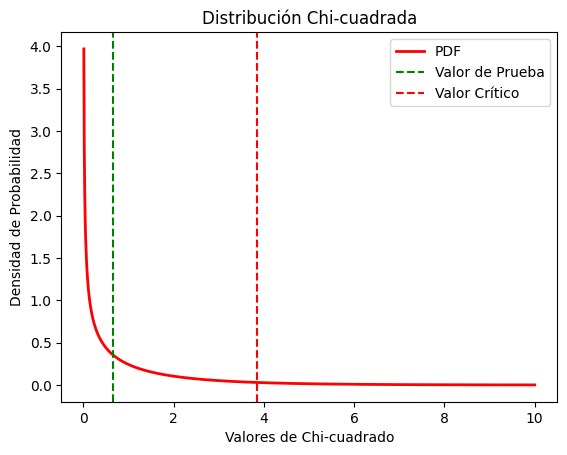

In [ ]:
f_visualizar_chi_yule(chi2, alfa)




# Interpretación


Estas tablas se convirtieron a formato tablas cruzadas para representarlas visualmente a través de la función previamente codificada.

Con los datos de las tablas de contingencias se construye la prueba de Yule.

Con el ejercicio de deporte lesiones, se construye una tabla cruzada a partir de la carga de datos originales que simulan las respuestas de una encuesta que recaba si hace o no deporte y si tiene lesión o no.

La tabla cruazada se utilzia para visualizar las barras combinadas.

Luego en el ejercicio de la deporte-lesiones se extraen los valroes a,b,c,d de la tabla cruzada a tabla de solo datos que sirven para la prueba de Yule.

La pruba de Yule se utiliza para representar la significación estadística entre dos variables catgóricas.

El valor *p_value* en una prueba estadística de Yule, se utiliza para determinar si existe una relación estadísticamente significativa entre las variables categóricas que se analiza.

En los ejercicios dependiendo de cada conteto y con estos datos simulados se obtuvieron estos resultados:

Para el ejercicio de *género-alcohol* resultó que si hay evidencia para concluir que hay una relación significativa a la inversa entre el consumo de alcohol entre hombre y mujeres. Se observa que los hombres consumen más alcohol y estadísticamente se hizo la prueba que así lo demuestra.

Luego en el ejercicio de estudiar y aprobar se encuentra que si hay relación estadística entre ambas variables; sin embargo es a la inversa, y analizando la tabla resulta que aprobaron muchos estudiantes sin haber estudiado.

En el ejercicio de deporte y lesiones no se encontró alguna evidencia estadística entre deporte y lesiones.

La representación visual de la distribución chi cuadrada representa el valor *p_valor* a partir del estadístico chi calculado con a prueba de Yule contrastado contra el valor crítico por la derecha al valor del alfa de 0.05.


Si el valor de prueba *p_prueba* está por la izquierda del valor crítico de chi cuadrada por la derecha entonces se concluye que no hay evidencia estadística de relación entre dos variables categóricas.

Con respecto a la representación visual de usando la distribución *chi cuadrada*; si el valor de chi calculado está visualmente por la izquierda del valor crítico de *chi cuadrada* cola a la derecha a 1 grado de libertad $gl$, entonces se concluye que no hay evidencia estadística de relación entre dos variables categóricas.

$$
Ho: \text{No hay relación entre variables}
$$

$$
Ha: \text{Si hay relación entre variables}
$$

Condición para hipótesis con *chi cuadrada*:

$$
\text{Si (chi calculado < chi critico): Se acepta Ho}
$$

$$
\text{Si (chi calculado  ≥ chi critico): Se rechaza Ho}
$$


Finalmente se concluye que la prueba de Yule es solo un elemento estadístico que mide la relación entre dos variables categóricas, es obligación y responsabilidad del analista investigador y científico de datos extraer los datos, la construcción de las tablas de contingencia y la realización de la prueba Yule así como la interpretación de la misma.  